In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder,StandardScaler
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import tensorflow as tf




In [3]:
parks_df = pd.read_csv("./Resources/NPSCamp-Missing States Removed (4-11-23).csv")

In [4]:
parks_df.head()

,name,parkCode,state,longitude,latitude,totalSites,tentOnly,electricalHookups,showers,dumpStation,host,potableWater,firewoodForSale,reservationUrl
0,Barry's Landing & Trail Creek Campground,bica,WY,-108.225571,45.104413,30,16,0,['None'],No,Yes - seasonal,['No water'],No,http://www.hiddentreasurecharters.com
1,Belle Fourche River Campground,deto,WY,-104.706344,44.581834,46,3,0,['None'],No,Yes - seasonal,['Yes - seasonal'],No,NaN
2,Bridge Bay Campground,yell,WY,-110.436924,44.534438,432,0,0,['None'],Yes - seasonal,Yes - seasonal,['Yes - seasonal'],Yes - seasonal,https://secure.yellowstonenationalparklodges.c...
3,Canyon Campground,yell,WY,-110.487912,44.735384,273,0,0,['Hot - Seasonal'],Yes - seasonal,Yes - seasonal,['Yes - seasonal'],Yes - seasonal,https://secure.yellowstonenationalparklodges.c...
4,Colter Bay Campground,grte,WY,-110.641379,43.907478,324,0,13,['Coin-Operated - Seasonal'],Yes - seasonal,Yes - seasonal,['Yes - year round'],Yes - seasonal,https://www.recreation.gov/camping/campgrounds...


In [5]:
# Determine the number of unique values in each column.
parks_df.nunique()

name                 439
parkCode              96
state                 34
longitude            440
latitude             440
totalSites           140
tentOnly              64
electricalHookups     32
showers               18
dumpStation            3
host                   3
potableWater           5
firewoodForSale        3
reservationUrl       224
dtype: int64

In [6]:
# get the count of each unique value of park code
codeCounts =  parks_df.parkCode.value_counts()
codeCounts

isro    33
choh    30
laro    21
grsm    13
glac    13
        ..
amme     1
hove     1
deto     1
cana     1
meve     1
Name: parkCode, Length: 96, dtype: int64

<Axes: ylabel='Density'>

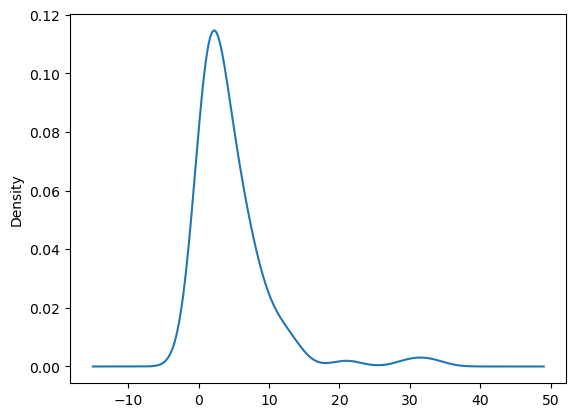

In [7]:
parks_df.parkCode.value_counts().plot.density()

In [8]:
replaceCodes = list(codeCounts[codeCounts < 10].index)

for cd in replaceCodes:
    parks_df.parkCode = parks_df.parkCode.replace(cd,"Other")
    
parks_df.parkCode.value_counts()

Other    279
isro      33
choh      30
laro      21
grsm      13
glac      13
seki      13
yell      12
olym      11
deva      10
buff      10
Name: parkCode, dtype: int64

In [9]:
# get the count of each unique value of showers
showerCounts = parks_df.showers.value_counts()
showerCounts

['None']                                                   343
[]                                                          21
['Hot - Seasonal']                                          17
['Hot - Year Round']                                        14
['Coin-Operated - Seasonal']                                11
['Cold- Seasonal', 'Free - Seasonal']                        9
['Hot - Year Round', 'Free - Year Round']                    7
['Hot - Seasonal', 'Coin-Operated - Seasonal']               5
['Hot - Seasonal', 'Free - Seasonal']                        4
['Free - Seasonal', 'Hot - Year Round']                      3
['Cold - Year Round', 'Free - Year Round']                   2
['Hot - Year Round', 'Coin-Operated - Year Round']           2
['Free - Year Round', 'Hot - Year Round']                    2
['Coin-Operated - Seasonal', 'None']                         1
['None', 'Free - Seasonal']                                  1
['Hot - Seasonal', 'Cold- Seasonal', 'Free - Seasonal']

<Axes: ylabel='Density'>

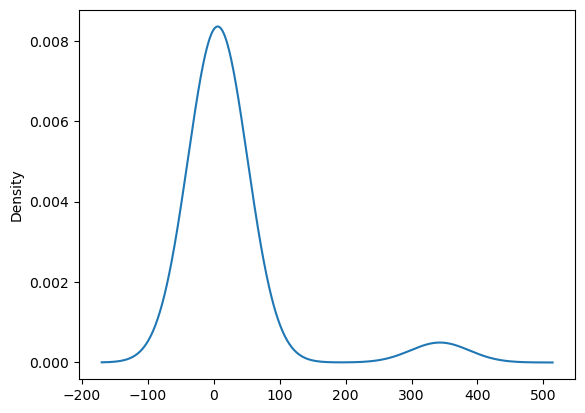

In [10]:
parks_df.showers.value_counts().plot.density()

In [11]:
replaceShowers = list(showerCounts[showerCounts < 10].index)

for shwr in replaceShowers:
    parks_df.showers = parks_df.showers.replace(shwr,"Other")
    
parks_df.showers.value_counts()

['None']                        343
Other                            39
[]                               21
['Hot - Seasonal']               17
['Hot - Year Round']             14
['Coin-Operated - Seasonal']     11
Name: showers, dtype: int64

In [12]:
stateCounts = parks_df.state.value_counts()
stateCounts

CA    70
MD    45
WA    39
MI    39
WY    24
AZ    19
UT    18
VA    17
CO    15
FL    15
MT    15
NC    14
TN    13
AK    12
AR    11
TX    10
WV     9
ME     9
KY     6
MO     6
NV     6
MN     4
HI     4
ID     3
SD     3
OR     3
MS     3
NM     3
IN     2
PA     2
NJ     2
NE     2
NI     1
MP     1
Name: state, dtype: int64

<Axes: ylabel='Density'>

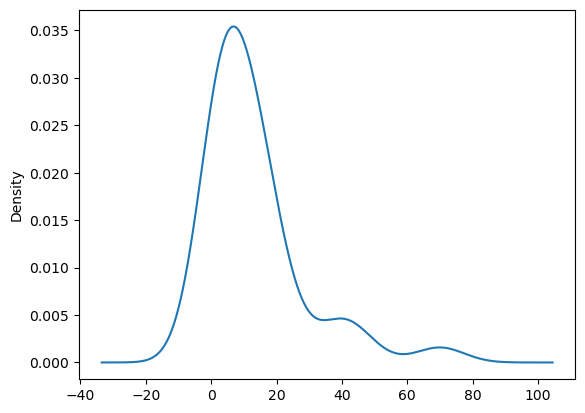

In [13]:
parks_df.state.value_counts().plot.density()

In [14]:
replaceStates = list(stateCounts[stateCounts < 10].index)

for st in replaceStates:
    parks_df.state = parks_df.state.replace(st,"Other")
    
parks_df.state.value_counts()

CA       70
Other    69
MD       45
WA       39
MI       39
WY       24
AZ       19
UT       18
VA       17
FL       15
CO       15
MT       15
NC       14
TN       13
AK       12
AR       11
TX       10
Name: state, dtype: int64

In [15]:
parks_df.dtypes

name                  object
parkCode              object
state                 object
longitude            float64
latitude             float64
totalSites             int64
tentOnly               int64
electricalHookups      int64
showers               object
dumpStation           object
host                  object
potableWater          object
firewoodForSale       object
reservationUrl        object
dtype: object

In [16]:
# Generate our categorical variable lists
cat_list = ['parkCode',
            'state',
            'showers',
            'dumpStation',
            'host',
            'potableWater',
            'firewoodForSale']

# Create a OneHotEncoder instance

enc2 = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
park_encode_df = pd.DataFrame(enc2.fit_transform(parks_df[cat_list]))

# Add the encoded variable names to the dataframe
park_encode_df.columns = enc2.get_feature_names_out(cat_list)
park_encode_df.head()

C:\Users\razza\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,parkCode_Other,parkCode_buff,parkCode_choh,parkCode_deva,parkCode_glac,parkCode_grsm,parkCode_isro,parkCode_laro,parkCode_olym,parkCode_seki,...,host_nan,potableWater_['No water'],"potableWater_['Water', ' but not potable']",potableWater_['Yes - seasonal'],potableWater_['Yes - year round'],potableWater_[],firewoodForSale_No,firewoodForSale_Yes - seasonal,firewoodForSale_Yes - year round,firewoodForSale_nan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [17]:
# Merge one-hot encoded features and drop the originals along with the outcome variable and unneeded variables
parks_df = parks_df.merge(park_encode_df,left_index=True,right_index=True).drop(cat_list,1)
Y = ['parkCode_Other', 
             'parkCode_buff', 
             'parkCode_choh', 
             'parkCode_deva', 
             'parkCode_glac', 
             'parkCode_grsm', 
             'parkCode_isro',
            'parkCode_laro',
            'parkCode_olym',
            'parkCode_seki', 'parkCode_yell']
parks_df.drop(['name', 'reservationUrl'], axis=1, inplace=True)
y= parks_df[Y]
parks_df.drop(Y, axis=1, inplace=True)
X = parks_df
X.head()


C:\Users\razza\AppData\Local\Temp\ipykernel_14264\933983455.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  parks_df = parks_df.merge(park_encode_df,left_index=True,right_index=True).drop(cat_list,1)


,longitude,latitude,totalSites,tentOnly,electricalHookups,state_AK,state_AR,state_AZ,state_CA,state_CO,...,host_nan,potableWater_['No water'],"potableWater_['Water', ' but not potable']",potableWater_['Yes - seasonal'],potableWater_['Yes - year round'],potableWater_[],firewoodForSale_No,firewoodForSale_Yes - seasonal,firewoodForSale_Yes - year round,firewoodForSale_nan
0,-108.225571,45.104413,30,16,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-104.706344,44.581834,46,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-110.436924,44.534438,432,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-110.487912,44.735384,273,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-110.641379,43.907478,324,0,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [18]:
#these are the target variables
y.head()

,parkCode_Other,parkCode_buff,parkCode_choh,parkCode_deva,parkCode_glac,parkCode_grsm,parkCode_isro,parkCode_laro,parkCode_olym,parkCode_seki,parkCode_yell
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y['parkCode_choh'], random_state=78)

In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=45))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu", input_dim=45))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3680      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,141
Trainable params: 6,141
Non-trainable params: 0
_________________________________________________________________


In [32]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
11/11 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.8318
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9429
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9429
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.9429
Epoch 5/10
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.9429
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9429
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9429
Epoch 8/10
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.9429
Epoch 9/10
11/11 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.9429
Epoch 10/10
11/11 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.9429


In [35]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

4/4 - 0s - loss: nan - accuracy: 0.9018 - 327ms/epoch - 82ms/step
Loss: nan, Accuracy: 0.9017857313156128


<Axes: >

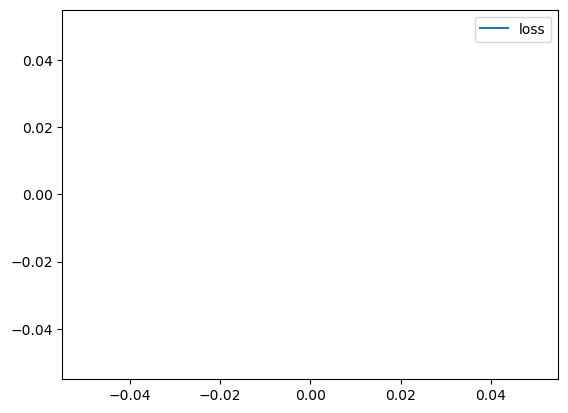

In [36]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<Axes: >

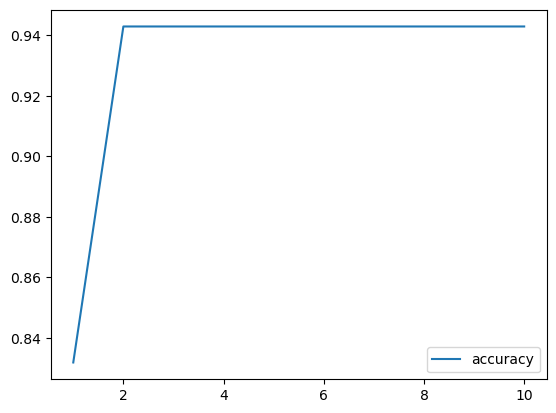

In [37]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [28]:
# Export our model to HDF5 file
nn.save("trained_model.h5")

In [49]:
# Predict the classification of a new set of blob data
new_X, new_Y = X_test, y_test
new_X_scaled = X_scaler.transform(new_X)
predictions = (nn.predict(new_X_scaled) > 0.5).astype("int32")

pd.DataFrame({"Prediction": predictions[:,0], "Actual": y_test})

4/4 [==============================] - 0s 4ms/step


,Prediction,Actual
91,0,0.0
398,0,0.0
141,0,0.0
439,0,0.0
257,0,1.0
...,...,...
311,0,0.0
71,0,0.0
195,0,0.0
347,0,0.0
